In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json
import re

In [43]:
import spacy.cli; 
spacy.cli.download("en_core_web_lg"); 

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


***Descriptive Statistics***

In [93]:
# import required packages

import spacy
import json
import re
import numpy as np
import spacy.cli; 
spacy.cli.download("en_core_web_lg"); 


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [94]:
# load the Spacy language model
nlp = spacy.load("en_core_web_lg")

# a default list of stop words set by the Spacy language model
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'several', 'due', 'where', 'hers', 'thereafter', 'would', 'our', 'hereupon', 'them', 'were', 'how', 'enough', 'very', 'give', 'am', 'ever', 'he', 'also', 'formerly', 'often', 'yet', 'whereafter', 'nor', 'same', 'thus', 'almost', 'just', 'yourself', 'meanwhile', 're', 'back', 'becomes', 'nobody', "'re", 'who', 'amongst', 'into', 'over', 'through', 'toward', 'six', 'beyond', 'throughout', 'could', 'her', 'two', 'more', 'down', 'whatever', 'seeming', 'by', 'unless', 'put', 'about', 'whenever', 'nowhere', 'under', 'though', 'everyone', 'on', 'call', 'name', 'move', 'once', '’s', 'everywhere', 'noone', 'none', 'here', 'thereupon', 'are', 'therefore', 'upon', 'show', 'sometimes', 'various', 'and', 'us', '’re', 'empty', 'below', 'up', 'go', 'sometime', 'still', 'too', 'those', 'since', 'afterwards', 'onto', 'n’t', 'many', 'can', 'but', 'than', 'others', 'cannot', 'herein', 'around', 'quite', 'been', 'that', 'anyone', 'therein', 'there', 'although', 'across', 'seems', 'n‘t', 'otherwise', 'fir

In [95]:
# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus
unique_author = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique authors
Date_list = [] # able to measure the number of comments by day, week, etc.
sum_of_retweet_count= 0
sum_of_favorite_count = 0
unique_submission = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique submissions

In [96]:
# data processing
with open("data_processed.json", "r") as file: # Need to first covert the csv store data to be a json file
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        text = line["Tweet"]
        doc = nlp(text)
        num_of_comments += 1
		# statistics regarding words
        num_of_tokens = len(doc)
        total_number_of_tokens += num_of_tokens
        token_count_without_stop_words = 0
        for token in doc:
            if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
                pass
            else:
                unique_word.add(str(token).lower())
                token_count_without_stop_words += 1
        num_of_token_per_comment.append(num_of_tokens)
        num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)
    # statistics regarding retweets
        number_of_retweets = line["Retweet Count"]
        sum_of_retweet_count += number_of_retweets

    # statistics regarding favorite counts
        number_of_favorite = line["Favorite Count"]
        sum_of_favorite_count += number_of_favorite

		# statistics regarding Date
        Date = line["Date"]
        Date_list.append(Date)

In [97]:
# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))

print ("Average retweet count",sum_of_retweet_count/num_of_comments)
print ("Average favorite count",sum_of_favorite_count/num_of_comments)

#print("number of unique authors:", len(unique_author))
#print("number of comments replying to other comments:", reply_count)
#print("number of sumbissions:", len(unique_submission))


number of comments: 5745
number of unique words: 9473
total number of words in the corpus: 148739
average number of words in comments: 25.890165361183637
average number of words in comments without stop words: 15.320974760661445
maximum number of words in comments: 93
maximum number of words in comments without stop words: 81
minimum number of words in comments: 1
minimum number of words in comments without stop words: 0
median number of words in comments: 22.0
median number of words in comments without stop words: 13.0
Average retweet count 0.5523063533507397
Average favorite count 5.100609225413403


**Documents without preprocessing**

In [ ]:
nlp = spacy.load("en_core_web_lg")

documents = []

with open("data_processed.json", "r") as file: 
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        print(line)
        documents.append(line["Tweet"])


processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
{'Id': 1630000000000000000, 'Date': '2023-02-16 16:47:00+00:00', 'Tweet': "😂😂😂\n\nCheck out PetSmart's video! #TikTok https://t.co/E3UkKzFISY", 'Location': '', 'Retweet Count': 0, 'Favorite Count': 0}
{'Id': 1630000000000000000, 'Date': '2023-02-16 16:39:02+00:00', 'Tweet': 'Did you know you can train cats to do tricks just like dogs? Treats and toys are always great motivators, and a good scritch between the ears certainly never hurts.\n\nCome meet Harmony at our Copperfield PetSmart by applying to adopt her, or by volunteering at the cattery! https://t.co/V2JJ3tcWwA', 'Location': 'Houston, TX', 'Retweet Count': 6, 'Favorite Count': 14}
{'Id': 1630000000000000000, 'Date': '2023-02-16 16:34:23+00:00', 'Tweet': '@APRETTYFVNGI https://t.co/fW52pQGbwv\ni worked at petsmart when i was in high school and one of the trainers had a Big siberian husky. i believe he was mixed with malimute but anyway , he was the most gentle giant', 'Location': 'admin : they 

In [ ]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(36, 0.09932556814255475), (67, 0.14216029322999904), (68, 0.20868268210610824), (69, 0.2235431594344969), (70, 0.2171979351990535), (71, 0.20078562464783428), (72, 0.20868268210610824), (73, 0.1817519254462374), (74, 0.13201310831275986), (75, 0.20868268210610824), (76, 0.20868268210610824), (77, 0.22940542594197555), (78, 0.1889803545858656), (79, 0.20772906974700997), (80, 0.20868268210610824), (81, 0.21603528811118877), (82, 0.20772906974700997), (83, 0.20772906974700997), (84, 0.2310068976658094), (85, 0.21603528811118877), (86, 0.27602390039079355), (87, 0.19696015623180493), (88, 0.20588382406682157), (89, 0.20588382406682157)]


**Documents with preprocessing**

In [98]:
nlp = spacy.load("en_core_web_lg")

documents = []

with open("data_processed.json", "r") as file: 
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
      
      documents.append(line["Tweet"])
      
for line in f:
  
    #print(line)
    text = line ["Tweet"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
       pass
    else:
      documents.append(re.sub('[^A-Za-z0-9]+', '', text))
#      documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  ","").replace('\"',"").replace("\'","").replace("/","").replace("\\","").replace("#","").replace(",","").replace("-","").replace("$",""))



In [58]:
processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
      if (token.is_stop) is True : # check whether the provided token is a stop word and decide whether to disregard it
        print("Stop word " + str(token))
        pass
      elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
        print("Doesnt have vector " + str(token))
        pass
      else:
        new_token = str(token.lemma_)# lemmatize
        if len(new_token) > 2 :
          temp_list.append(new_token) 
          
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

Streaming output truncated to the last 5000 lines.
Doesnt have vector Bcitdontevenmakesensetogetdroppedoffatpetsmartinthefirstplace
Doesnt have vector EthanSchmidtConfrontsonitsLGBTGayPrideforPets
Doesnt have vector ItisinexcusableIhaveworkedwithruralpoundsintheSouthwithfewresourcesandtheirstatsarenothinglikeNYCACCThisislargelyduetodedicatedvolunteerswhotakedogscatstoPetsmartforadoptionevents
Doesnt have vector HesmeetingwithhiscatnipdealerbehindthePetsmart
Doesnt have vector Thisgottabeaskitcausehowlongwasshefinnabeinpetsmartforhimtodoanything
Doesnt have vector IuseHempCalmingSupportavailableatPetsMartItworksformyCoco
Doesnt have vector idontfitinatpetsmartandthattruthremainsatthewalmart
Doesnt have vector IthinkabouthowwhenIgottubbyShitfeltlikeastraightdrugdealHadacrybabylittlekittyatPetSmartcauseIwassounprepared
Doesnt have vector SoIknowalothaschangedinthepast10yearshowevermythenboyfriendandIparented4lizardsamongotheranimalsfromPetsMartWemademistakesbuttherewasalsoalotofloveandall

In [59]:
print(corpus_tfidf[4])

[(28, 0.2508144816720796), (43, 0.5013541668947881), (44, 0.4795716529574622), (45, 0.202746333493246), (46, 0.2481600526993637), (47, 0.3829540535544883), (48, 0.3557050489749338), (49, 0.28262651733279864)]


In [90]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=5) # train LDA model

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [91]:
for topic in lda_model.show_topics(num_topics=12, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.015*"chewy" + 0.007*"petco" + 0.004*"thank" + 0.003*"PetSmart" + 0.003*"Petco"')
(1, '0.008*"petsmart" + 0.006*"Chewy" + 0.005*"chewy" + 0.004*"like" + 0.003*"Petco"')
(2, '0.009*"twice" + 0.003*"petco" + 0.003*"petsmart" + 0.002*"bar" + 0.002*"say"')
(3, '0.010*"Petco" + 0.004*"love" + 0.003*"Chewy" + 0.002*"que" + 0.002*"petco"')
(4, '0.007*"Petco" + 0.004*"Park" + 0.004*"park" + 0.003*"good" + 0.003*"dog"')
[(0, 0.26522672343680476), (1, 0.26522672343680476), (2, 0.22344381202053745), (3, 0.26522672343680476), (4, 0.1958894788453191), (5, 0.2447056830929757), (6, 0.25704407756135883), (7, 0.22650140510111208), (8, 0.26522672343680476), (9, 0.2121683868722995), (10, 0.2535490652920341), (11, 0.1314767980140526), (12, 0.19258364949178072), (13, 0.1584810490565583), (14, 0.26522672343680476), (15, 0.26522672343680476), (16, 0.23980910377142925), (17, 0.25704407756135883)]
(0, 0.03897908)
(1, 0.0388947)
(2, 0.84453523)
(3, 0.03880589)
(4, 0.038785126)
Wholesome Story Of A Boy Whi

In [92]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [86]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.34578540516789413


In [88]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

<ipython-input-89-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


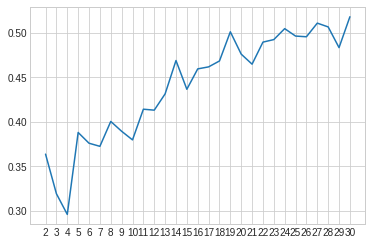

In [89]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [ ]:
# Other parameters related to training 
#lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=?, chunksize=?, passes=?, iterations=?)